# 全球疫情数据

In [78]:
"""
获取全球疫情数据
"""
import time
import traceback
import requests
import json
import pymysql


def get_world_data():
     url='https://api.inews.qq.com/newsqa/v1/automation/foreign/country/ranklist'
     headers={'user-agent': 'WOW64) AppleWEBKit/537.36 (Khtml, like Gecko) Chrome/86.0.4240.198 Safari/537.36'}
     # 创建会话对象
     # session = requests.session()
     # 请求接口
     # result = session.get('Https://api.inews.qq.com/newsqa/v1/automation/foreign/country/ranklist')
     # 打印结果
     # print(result.text)
     res = requests.get(url, headers=headers)
     # print(res.text)
     response_data_0 = json.loads(res.text.replace('Jquery34102848205531413024_1584924641755(', '')[:-1]) #转化json对象
     # print(response_data_0.keys())
     # print(response_data_0)
     response_data_1=response_data_0['data']
     # print(response_data_1)
     # print(response_data_1[0].keys())
     # data = jsonpath.jsonpath(resJson_1, '$.data.*')
     # print(resJson_1.keys())
     # for d in data:
     # res = '日期:' + d['date'] + '--' + d['continent'] + '--' + d['name'] + '--' + '新增确诊:' + str(
     # d['confirmAdd']) + '累计确诊:' + str(d['confirm']) + '治愈:' + str(d['heal']) + '死亡:' + str(d['dead'])
     # file = r'C:/Users/Administrator/Desktop/world_data.txt'
     # with open(file, 'w+', encoding='utf-8') as f:
     # f.write(res + '\n') # 加\n换行显示
     # f.close()
     world={}
     for i in response_data_1:
         temp=i['y']+'.'+i['date']
         tup = time.strptime(temp, '%Y.%m.%d')
         dt = time.strftime('%Y-%m-%d', tup) # 改变时间格式，插入数据库 日期
         # print(ds)
         c_name=i['name'] #国家
         continent=i['continent'] #所属大洲
         nowConfirm=i['nowConfirm'] #现有确诊
         confirm=i['confirm'] #累计确诊
         confirmAdd=i['confirmAdd'] #新增确诊
#          suspect=i['suspect'] #现有疑似
         heal=i['heal'] #累计治愈
         dead=i['dead'] #累计死亡
         confirmAddCut=i['confirmAddCut']
         confirmCompare=i['confirmCompare']
         nowConfirmCompare=i['nowConfirmCompare']
         healCompare=i['healCompare']
         deadCompare=i['deadCompare']
         world[c_name] = {'dt':dt ,
          'continent': continent,
          'nowConfirm': nowConfirm,
          'confirm': confirm,
          'confirmAdd': confirmAdd,
#           'suspect': suspect,
          'heal': heal,
          'dead': dead,
          'confirmAddCut': confirmAddCut,
          'confirmCompare': confirmCompare,
          'nowConfirmCompare': nowConfirmCompare,
          'healCompare': healCompare,
          'deadCompare': deadCompare,
          }
     return world
# mysql建立连接
def get_conn():
    # 建立连接
    con = pymysql.connect(host="127.0.0.1",
                          user="root",
                          password="12345678",
                          db="dt",
                          charset="utf8")
    # 创建游标
    cursor = con.cursor()
    return con, cursor


# mysql关闭连接
def close_conn(con, cursor):
    if cursor:
        cursor.close()
    if con:
        con.close()
def insert_world():
    cursor = None
    conn = None
    try:
            dic = get_world_data()
            print(dic)
            conn, cursor = get_conn()
            sql = "insert into world values(%s,%s,%s,%s,%s,%s,%s,%s,%s,%s,%s,%s,%s,%s,%s)"
            sql_query = 'select %s=(select dt from world order by id desc limit 1)' #对比当前最大时间戳
            cursor.execute(sql_query,dic['美国']['dt'])
            if not cursor.fetchone()[0]:
                print(f"{time.asctime()}开始插入世界数据")
                for k, v in dic.items(): # item 格式 {'2021-01-13': {'confirm': 41, 'suspect': 0, 'heal': 0, 'dead': 1}
                                 cursor.execute(sql, [0,v.get('dt'), k, v.get("continent"), v.get("nowConfirm"),
                      v.get("confirm"), v.get("confirmAdd"),v.get("suspect"),v.get("heal"), v.get("dead")
                      , v.get("confirmAddCut"), v.get("confirmCompare"), v.get("nowConfirmCompare"), v.get("healCompare"),
                     v.get("deadCompare")])
                conn.commit() # 提交事务
                print(f"{time.asctime()}插入世界数据完毕")
            else:
                 print(f"{time.asctime()}世界数据已是最新数据！")
    except:
        traceback.print_exc()
    finally:
        close_conn(conn, cursor)

In [79]:
if __name__ == "__main__":
    insert_world()
#     get_conn()


{'美国': {'dt': '2021-08-31', 'continent': '北美洲', 'nowConfirm': 8187367, 'confirm': 39668541, 'confirmAdd': 3051, 'suspect': 0, 'heal': 30826478, 'dead': 654696, 'confirmAddCut': 0, 'confirmCompare': 0, 'nowConfirmCompare': 0, 'healCompare': 0, 'deadCompare': 0}, '印度': {'dt': '2021-08-30', 'continent': '亚洲', 'nowConfirm': 1324981, 'confirm': 32737939, 'confirmAdd': 42909, 'suspect': 0, 'heal': 30974748, 'dead': 438210, 'confirmAddCut': 0, 'confirmCompare': 0, 'nowConfirmCompare': 0, 'healCompare': 0, 'deadCompare': 0}, '巴西': {'dt': '2021-08-30', 'continent': '南美洲', 'nowConfirm': 2391279, 'confirm': 20741815, 'confirmAdd': 13210, 'suspect': 0, 'heal': 17771228, 'dead': 579308, 'confirmAddCut': 0, 'confirmCompare': 0, 'nowConfirmCompare': 0, 'healCompare': 0, 'deadCompare': 0}, '法国': {'dt': '2021-08-30', 'continent': '欧洲', 'nowConfirm': 6297529, 'confirm': 6827146, 'confirmAdd': 13630, 'suspect': 0, 'heal': 415111, 'dead': 114506, 'confirmAddCut': 0, 'confirmCompare': 0, 'nowConfirmCompare

In [50]:
import pandas as pd

df_world = pd.read_csv('world.csv',encoding='utf8')
df_world

,id,dt,c_name,continent,nowConfirm,confirm,confirmAdd,suspect,heal,dead,confirmAddCut,confirmCompare,nowConfirmCompare,healCompare,deadCompare
0,1,31/8/2021 00:00:00,美国,北美洲,8187367,39668541,3051,0,30826478,654696,0,0,0,0,0
1,2,30/8/2021 00:00:00,印度,亚洲,1324981,32737939,42909,0,30974748,438210,0,0,0,0,0
2,3,30/8/2021 00:00:00,巴西,南美洲,2391279,20741815,13210,0,17771228,579308,0,0,0,0,0
3,4,30/8/2021 00:00:00,法国,欧洲,6297529,6827146,13630,0,415111,114506,0,0,0,0,0
4,5,30/8/2021 00:00:00,俄罗斯,欧洲,977427,6785465,0,0,5629581,178457,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
189,190,30/8/2021 00:00:00,马绍尔群岛,大洋洲,0,4,0,0,4,0,0,0,0,0,0
190,191,30/8/2021 00:00:00,萨摩亚,NaN,0,3,0,0,3,0,0,0,0,0,0
191,192,30/8/2021 00:00:00,帕劳,大洋洲,2,2,0,0,0,0,0,0,0,0,0
192,193,30/8/2021 00:00:00,基里巴斯,大洋洲,2,2,0,0,0,0,0,0,0,0,0


In [59]:
d = df_world.groupby(['continent'])['confirm','confirmAdd','heal','dead'].sum().reset_index()
d

,continent,confirm,confirmAdd,heal,dead
0,亚洲,69604110,73934,58523675,1025307
1,其他,712,0,699,13
2,北美洲,47451512,20210,36579842,988244
3,南美洲,36829534,27203,32291247,1128369
4,大洋洲,120029,1411,55672,1700
5,欧洲,55226499,63616,32081882,1170483
6,非洲,7744582,16016,5958606,194831


In [60]:
d.to_csv('continents.csv',index=0,encoding='utf-8')

# 全国疫情数据

In [38]:
import pandas as pd

df = pd.read_csv('China_province_datas.csv',encoding='gbk')
df = df.drop(['疫情风险等级'],axis=1)

df

,省份,城市,日期,新增病例,累计确诊,累计死亡,累计治愈,现有确诊
0,辽宁,沈阳,2022/3/15,6,101,0,80,21
1,吉林,吉林,2022/3/15,2802,4330,1,49,4280
2,辽宁,营口,2022/3/15,8,24,0,11,13
3,浙江,嘉兴,2022/3/15,16,65,0,46,19
4,陕西,铜川,2022/3/15,2,10,0,8,2
...,...,...,...,...,...,...,...,...
122,广西,南宁,2021/1/15,0,57,0,56,1
123,北京,怀柔,2021/1/1,0,8,0,4,4
124,江苏,徐州,2020/2/17,0,80,0,79,1
125,江苏,南通,2020/2/15,0,41,0,40,1


In [2]:
from pyecharts import options as opts
from pyecharts.charts import Bar,Line,Pie,Map,Grid 
df1 = df.sort_values(by=['新增病例'],ascending=False)[:10]
df1 

,省份,城市,日期,新增病例,累计确诊,累计死亡,累计治愈,现有确诊
1,吉林,吉林,2022/3/15,2802,4330,1,49,4280
50,吉林,长春,2022/3/15,575,2122,0,150,1972
41,山东,青岛,2022/3/15,48,873,1,79,793
42,陕西,宝鸡,2022/3/15,40,162,0,13,149
49,广东,深圳,2022/3/15,39,982,3,428,551
16,福建,泉州,2022/3/15,31,112,0,71,41
29,天津,武清区,2022/3/15,26,53,0,2,51
61,山东,滨州,2022/3/15,19,39,0,15,24
3,浙江,嘉兴,2022/3/15,16,65,0,46,19
18,江苏,常州,2022/3/15,15,72,0,54,18


In [39]:
# datas = df[['省份','累计确诊','累计死亡','累计治愈','现有确诊']].sum().reset_index()
datas = df.groupby(['省份'])['累计确诊','新增病例','累计死亡','累计治愈','现有确诊'].sum().reset_index()
datas

,省份,累计确诊,新增病例,累计死亡,累计治愈,现有确诊
0,上海,323,9,5,230,88
1,云南,483,4,1,388,94
2,内蒙古,1266,0,0,1221,45
3,北京,996,6,9,513,474
4,吉林,6575,3393,2,227,6346
5,四川,236,0,3,196,37
6,天津,721,51,3,498,220
7,山东,1286,106,5,327,954
8,山西,107,0,0,85,22
9,广东,2141,48,6,1323,812


In [40]:
# datas[['现有确诊']].sort_values(by="现有确诊",axis=0,ascending=False)
deadRate = (datas['累计死亡'] / datas['累计确诊']).round(2)
# deadRate

In [41]:
healRate = (datas['累计治愈'] / datas['累计确诊']).round(2)
# healRate


In [42]:
datas['deadRate']=deadRate
datas['healRate']=healRate

In [45]:
# datas.to_csv('china_data.csv',index=0,encoding='utf-8')
datas

,省份,累计确诊,新增病例,累计死亡,累计治愈,现有确诊,deadRate,healRate
0,上海,323,9,5,230,88,0.02,0.71
1,云南,483,4,1,388,94,0.00,0.80
2,内蒙古,1266,0,0,1221,45,0.00,0.96
3,北京,996,6,9,513,474,0.01,0.52
4,吉林,6575,3393,2,227,6346,0.00,0.03
5,四川,236,0,3,196,37,0.01,0.83
6,天津,721,51,3,498,220,0.00,0.69
7,山东,1286,106,5,327,954,0.00,0.25
8,山西,107,0,0,85,22,0.00,0.79
9,广东,2141,48,6,1323,812,0.00,0.62


In [61]:
# datas['deadRate'].tolist()

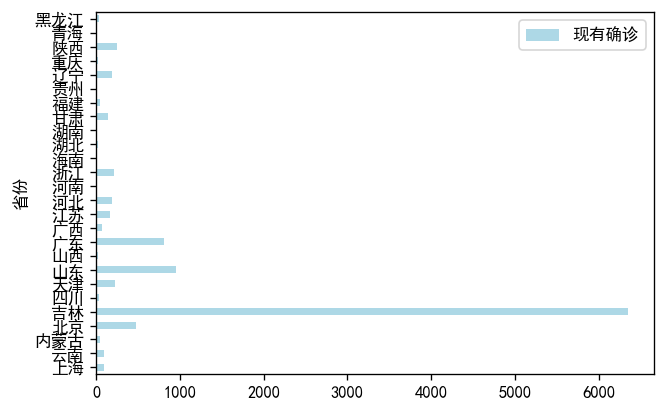

In [11]:
#对全国各省份现有确诊人数进行Matplotlib绘制水平柱状图
import pandas as pd
import matplotlib .pyplot as plt
from matplotlib import rcParams
plt.rcParams['font.sans-serif']=['SimHei']    #正常显示中文
plt.rcParams['figure.dpi'] = 120#设置所有图片的清晰度
rcParams['font.family'] = 'simhei'
people = datas[['省份','现有确诊']]
people.plot.barh(x='省份',y='现有确诊',color='lightblue')
plt.xticks(rotation=360)
plt.show()

In [12]:
china_data10 = datas[['现有确诊','累计确诊','累计死亡','累计治愈']]
china_data10

,现有确诊,累计确诊,累计死亡,累计治愈
0,88,323,5,230
1,94,483,1,388
2,45,1266,0,1221
3,474,996,9,513
4,6346,6575,2,227
5,37,236,3,196
6,220,721,3,498
7,954,1286,5,327
8,22,107,0,85
9,812,2141,6,1323


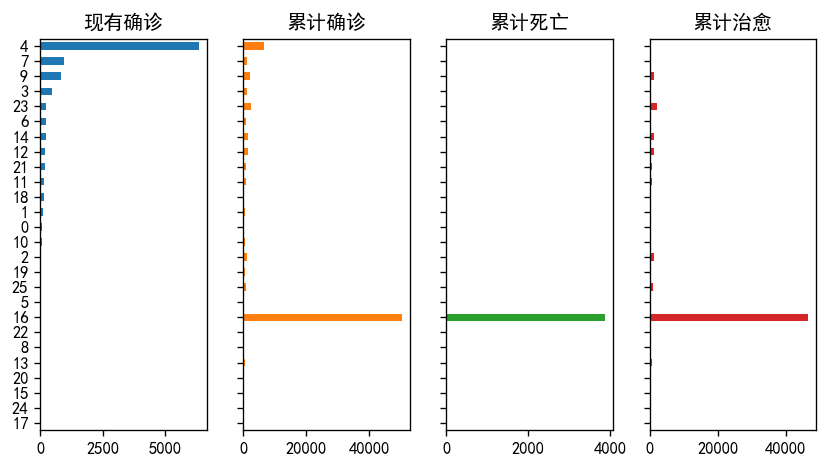

In [13]:
# 导入matplotlib
import matplotlib.pyplot as plt
plt.rcParams['font.sans-serif']=['SimHei']    #正常显示中文
plt.rcParams['figure.dpi'] = 120#设置所有图片的清晰度
# 绘制条形图
china_data10.sort_values('现有确诊').plot.barh(subplots=True,layout=(1,4),sharex=False,
                                             figsize=(7,4),legend=False,sharey=True)

plt.tight_layout()   #调整子图间距
plt.show()

In [14]:
# datas.to_csv('./China_datas.csv',index=0,encoding='utf-8')

In [15]:
line = (
    Line()
    .add_xaxis(list(datas['省份'].values))
    .add_yaxis("治愈率", datas['healRate'].values.tolist())
    .add_yaxis("死亡率", datas['deadRate'].values.tolist())
    .set_global_opts(
        title_opts=opts.TitleOpts(title="各省死亡率与治愈率分布情况"),

    )
)
line.render_notebook() 

In [16]:
bar = (
    Bar()
    .add_xaxis(list(datas['省份'].values))
    .add_yaxis("死亡", datas['累计死亡'].values.tolist())
    .add_yaxis("治愈", datas['累计治愈'].values.tolist())
    .set_global_opts(
        title_opts=opts.TitleOpts(title="各地区死亡人数与治愈人数分布情况"),
        datazoom_opts=[opts.DataZoomOpts()],
        )
)
bar.render_notebook() 

In [17]:
datas['省份'].values.tolist()

['上海',
 '云南',
 '内蒙古',
 '北京',
 '吉林',
 '四川',
 '天津',
 '山东',
 '山西',
 '广东',
 '广西',
 '江苏',
 '河北',
 '河南',
 '浙江',
 '海南',
 '湖北',
 '湖南',
 '甘肃',
 '福建',
 '贵州',
 '辽宁',
 '重庆',
 '陕西',
 '青海',
 '黑龙江']

In [18]:
pie = (
    Pie()
    .add(
        "",
        [list(i) for i in zip(datas['省份'].values.tolist(),datas['累计确诊'].values.tolist())],
        radius = ["10%","30%"]
    )
    .set_global_opts(
            legend_opts=opts.LegendOpts(orient="vertical", pos_top="70%", pos_left="70%"),
    )
    .set_series_opts(label_opts=opts.LabelOpts(formatter="{b}: {c}"))
)
pie.render_notebook()


In [19]:
from pyecharts.globals import CurrentConfig, NotebookType
CurrentConfig.NOTEBOOK_TYPE = NotebookType.JUPYTER_NOTEBOOK


In [20]:
# 导入对应的绘图工具包
import pandas as pd
from pyecharts import options as opts
from pyecharts.charts import Map

# 1.根据绘制国内总疫情图（确诊）
data = datas.groupby(by='省份',as_index=False).sum()
data_list = list(zip(datas['省份'].values.tolist(),datas['累计确诊'].values.tolist()))

def map_china() -> Map:
    c = (
        Map()
        .add(series_name="确诊病例",data_pair=data_list,maptype='china')
        .set_global_opts(
            title_opts = opts.TitleOpts(title='中国疫情地图'),
            visualmap_opts=opts.VisualMapOpts(is_piecewise=True,
                  pieces = [{"max":9, "min":0, "label":"0-9","color":"#FFE4E1"},
                            {"max":99, "min":10, "label":"10-99","color":"#FF7F50"},
                            {"max":499, "min":100, "label":"100-4999","color":"#F08080"},
                            {"max":999, "min":500, "label":"500-999","color":"#CD5C5C"},
                            {"max":9999, "min":1000, "label":"1000-9999","color":"#990000"},
                            {"max":99999, "min":10000, "label":"10000-99999","color":"#660000"},]
            )
        )
    )
    return c

d_map = map_china()
# d_map.render("mapEchrts.html")
d_map.render_notebook()
# from pyecharts.charts import Map
# import pyecharts.options as opts
# from pyecharts.globals import ChartType

# (
#     Map()
#     .add("",[list(z) for z in zip(list(datas['省份']), list(datas['累计确诊']))], "china",is_map_symbol_show=False)
#     .set_global_opts(title_opts=opts.TitleOpts(title="COVID-19中国各地区总确诊人数地图"),visualmap_opts=opts.VisualMapOpts(is_piecewise=True,
#                 pieces = [

#                         {"min": 5000 , "label": '>5000',"color": "#893448"}, #不指定 max，表示 max 为无限大
#                         {"min": 1000, "max": 4999, "label": '1000-4999',"color" : "#ff585e" },
#                         {"min": 500, "max": 999, "label": '500-1000',"color": "#fb8146"},
#                         {"min": 101, "max": 499, "label": '101-499',"color": "#ffA500"},
#                         {"min": 10, "max": 100, "label": '10-100',"color": "#ffb248"},
#                         {"min": 0, "max": 9, "label": '0-9',"color" : "#fff2d1" }]))

# ).render_notebook()

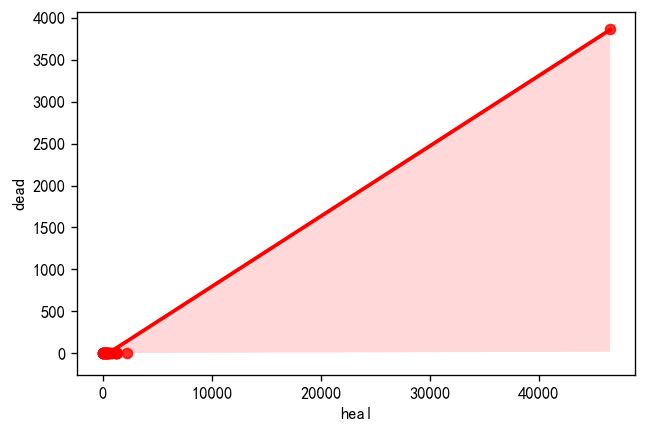

In [21]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings("ignore")
four=pd.DataFrame(pd.read_csv('China_datas.csv',encoding='gbk'))
sns.regplot(x='heal',y='dead',data=four,color='r')
plt.show()

In [22]:
from sklearn import datasets
from sklearn.linear_model import LinearRegression
import pandas as pd
import numpy as np
import seaborn as sns
predict_model = LinearRegression()
three=pd.DataFrame(pd.read_csv('China_datas.csv',encoding='gbk'))
X = three['heal'].values
X = X.reshape(-1,1)
predict_model.fit(X , three['dead'])
np.set_printoptions(precision = 3, suppress = True)
a = predict_model.coef_
b = predict_model.intercept_
print("回归方程系数{}".format(predict_model.coef_))
print("回归方程截距{0:2f}".format(predict_model.intercept_))
print("线性回归预测模型表达式为{}*x+{}".format(predict_model.coef_,predict_model.intercept_))

回归方程系数[0.084]
回归方程截距-43.949917
线性回归预测模型表达式为[0.084]*x+-43.949916665024375


# 全国疫情每日数据

In [30]:
import pandas as pd

df = pd.read_csv('China_province_datas.csv',encoding='gbk')
df = df.drop(['疫情风险等级'],axis=1)

df

,省份,城市,日期,新增病例,累计确诊,累计死亡,累计治愈,现有确诊
0,辽宁,沈阳,2022/3/15,6,101,0,80,21
1,吉林,吉林,2022/3/15,2802,4330,1,49,4280
2,辽宁,营口,2022/3/15,8,24,0,11,13
3,浙江,嘉兴,2022/3/15,16,65,0,46,19
4,陕西,铜川,2022/3/15,2,10,0,8,2
...,...,...,...,...,...,...,...,...
122,广西,南宁,2021/1/15,0,57,0,56,1
123,北京,怀柔,2021/1/1,0,8,0,4,4
124,江苏,徐州,2020/2/17,0,80,0,79,1
125,江苏,南通,2020/2/15,0,41,0,40,1


In [31]:
dates = df.groupby(['日期'])['累计确诊','累计死亡','累计治愈','现有确诊'].sum().reset_index()
dates.head()

,日期,累计确诊,累计死亡,累计治愈,现有确诊
0,2020/2/12,9,0,8,1
1,2020/2/15,41,0,40,1
2,2020/2/17,80,0,79,1
3,2021/1/1,8,0,4,4
4,2021/1/15,57,0,56,1


In [32]:
dates['日期'] = pd.to_datetime(dates['日期'])
# dates['日期'] =dates.日期.apply(lambda x: pd.to_datetime(x).strftime('%Y-%m-%d'))

dates.head()

,日期,累计确诊,累计死亡,累计治愈,现有确诊
0,2020-02-12,9,0,8,1
1,2020-02-15,41,0,40,1
2,2020-02-17,80,0,79,1
3,2021-01-01,8,0,4,4
4,2021-01-15,57,0,56,1


In [33]:
dates['年'] = dates['日期'].dt.year
# dates['月'] = dates['日期'].dt.month
# df['Day'] = df['Joined date'].dt.day

In [34]:
dates

,日期,累计确诊,累计死亡,累计治愈,现有确诊,年
0,2020-02-12,9,0,8,1,2020
1,2020-02-15,41,0,40,1,2020
2,2020-02-17,80,0,79,1,2020
3,2021-01-01,8,0,4,4,2021
4,2021-01-15,57,0,56,1,2021
5,2021-11-16,296,0,295,1,2021
6,2021-11-08,70,0,50,20,2021
7,2022-01-17,2,0,1,1,2022
8,2022-01-20,489,5,483,1,2022
9,2022-01-23,31,0,12,19,2022


In [20]:
# dates.to_csv('./dates_datas.csv',index=0,encoding='utf-8')

In [35]:
dates.groupby(['年'])['累计确诊','累计死亡','累计治愈','现有确诊'].sum().reset_index()

,年,累计确诊,累计死亡,累计治愈,现有确诊
0,2020,130,0,127,3
1,2021,431,0,405,26
2,2022,74344,3930,59980,10434


In [220]:
# 
# datas['日期'].values
# df['日期'] = df.日期.apply(lambda x: x.strftime('%Y-%m')).astype('datetime64') # 先按想要的格式转为字符串，再转为日期格式


In [193]:
df['日期'].values

array(['2022-03-01', '2022-03-01', '2022-03-01', '2022-03-01',
       '2022-03-01', '2022-03-01', '2022-03-01', '2022-03-01',
       '2022-03-01', '2022-03-01', '2022-03-01', '2022-03-01',
       '2022-03-01', '2022-03-01', '2022-03-01', '2022-03-01',
       '2022-03-01', '2022-03-01', '2022-03-01', '2022-03-01',
       '2022-03-01', '2022-03-01', '2022-03-01', '2022-03-01',
       '2022-03-01', '2022-03-01', '2022-03-01', '2022-03-01',
       '2022-03-01', '2022-03-01', '2022-03-01', '2022-03-01',
       '2022-03-01', '2022-03-01', '2022-03-01', '2022-03-01',
       '2022-03-01', '2022-03-01', '2022-03-01', '2022-03-01',
       '2022-03-01', '2022-03-01', '2022-03-01', '2022-03-01',
       '2022-03-01', '2022-03-01', '2022-03-01', '2022-03-01',
       '2022-03-01', '2022-03-01', '2022-03-01', '2022-03-01',
       '2022-03-01', '2022-03-01', '2022-03-01', '2022-03-01',
       '2022-03-01', '2022-03-01', '2022-03-01', '2022-03-01',
       '2022-03-01', '2022-03-01', '2022-03-01', '2022-

In [212]:
line = (
    Line()
    .add_xaxis(list(dates['日期'].sort_index()))
    .add_yaxis("现有确诊", dates['现有确诊'].values.tolist())
    .set_global_opts(
        title_opts=opts.TitleOpts(title="疫情现有确诊变化情况"),
        datazoom_opts=[opts.DataZoomOpts(orient= 'horizontal',pos_left='right')],
#         datazoom_opts=[opts.DataZoomOpts(orient= 'vertical',pos_left='right')],
        xaxis_opts=opts.AxisOpts(
            axislabel_opts={"rotate":45}
            
        )
    )
)
line.render_notebook() 



In [112]:
datas.groupby(by='省份',as_index=False).sum()

,省份,累计确诊,累计死亡,累计治愈,现有确诊,deadRate,healRate
0,上海,323,5,230,88,0.02,0.71
1,云南,483,1,388,94,0.00,0.80
2,内蒙古,1266,0,1221,45,0.00,0.96
3,北京,996,9,513,474,0.01,0.52
4,吉林,6575,2,227,6346,0.00,0.03
5,四川,236,3,196,37,0.01,0.83
6,天津,721,3,498,220,0.00,0.69
7,山东,1286,5,327,954,0.00,0.25
8,山西,107,0,85,22,0.00,0.79
9,广东,2141,6,1323,812,0.00,0.62


In [224]:
line = (
    Line()
    .add_xaxis(list(dates['日期'].sort_index()))
    .add_yaxis("累计治愈", dates['累计治愈'].values.tolist())
    .add_yaxis("累计死亡", dates['累计死亡'].values.tolist())

    .set_global_opts(
        title_opts=opts.TitleOpts(title="疫情累计治愈与累计死亡变化情况"),
        datazoom_opts=[opts.DataZoomOpts(orient= 'horizontal',pos_left='right')],
#         datazoom_opts=[opts.DataZoomOpts(orient= 'vertical',pos_left='right')],
        xaxis_opts=opts.AxisOpts(
            axislabel_opts={"rotate":45}
            
        )
    )
)
line.render_notebook() 

